In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'

In [5]:
path_metrics = f'{root}/maria_v2/metric_layers.csv'
df_metrics = pd.read_csv(path_metrics, index_col=0)

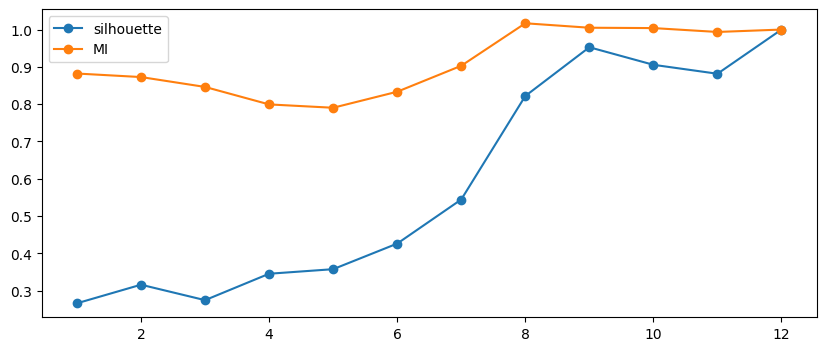

In [7]:
plt.figure(figsize=(10,4))
plt.plot(df_metrics['layer'], df_metrics['sil']/df_metrics['sil'].iloc[-1], '-o', label = 'silhouette')
plt.plot(df_metrics['layer'], df_metrics['mi']/df_metrics['mi'].iloc[-1], '-o', label = 'MI')
plt.legend()